In [1]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 6.5 MB/s eta 0:00:00


In [2]:
import xgboost
import shap
import warnings
warnings.filterwarnings('ignore')
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


****Train Random Forest Model****

In [3]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import xgboost
X, y = shap.datasets.iris()

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train a machine learning model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

#clf = xgboost.XGBClassifier()
#clf.fit(X_train, y_train)


# Make prediction on the testing data
y_pred = clf.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [9]:
X_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0


In [15]:
X_test.shape

(45, 4)

In [12]:
explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X_test)

#shap_values= explainer.shap_values(X_test[0:50])

In [13]:
shap_values

[array([[-2.26871602e-02,  2.63184688e-02,  3.41030600e-01,
          2.84766662e-01],
        [ 3.95944897e-02, -3.17851567e-02, -1.93666417e-01,
         -1.64714345e-01],
        [-3.49786139e-02, -1.63441518e-03, -1.66481607e-01,
         -1.47476793e-01],
        [ 5.29012556e-02,  1.24883936e-02,  3.18481935e-01,
          2.65556987e-01],
        [-3.43493605e-02,  9.07023667e-03, -1.65029337e-01,
         -1.60262968e-01],
        [-3.49078831e-02, -1.63441518e-03, -1.66372414e-01,
         -1.47656716e-01],
        [-3.51818010e-02, -2.39445124e-04, -1.64918225e-01,
         -1.50231957e-01],
        [ 5.76175834e-02,  1.24883936e-02,  3.17349456e-01,
          2.61973138e-01],
        [ 6.62018127e-02,  1.52648999e-03,  3.17349456e-01,
          2.64350812e-01],
        [-3.52020030e-02, -2.39445124e-04, -1.65029337e-01,
         -1.50100644e-01],
        [-2.51025816e-02, -9.90108185e-03, -1.69553365e-01,
         -1.46014400e-01],
        [ 5.29012556e-02,  1.24883936e-02, 

In [7]:
#shape of each class:
#np.shape
#(3, 45, 4)
#shape of class 0
np.shape(shap_values[0])

(45, 4)

# **Summary Plot**
Display the summary_plot using SHAP values and testing set.

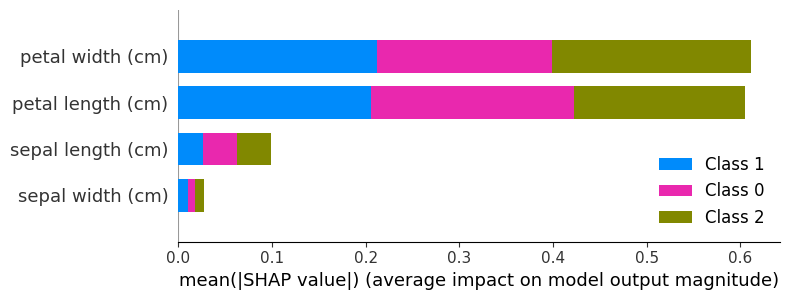

In [8]:
shap.summary_plot(shap_values, X_test)

The summary plot shows the feature importance of each feature in the model. The results show that **petal width** and **petal length** play major roles in determining the results.

In [14]:
shap_values[0]

array([[-2.26871602e-02,  2.63184688e-02,  3.41030600e-01,
         2.84766662e-01],
       [ 3.95944897e-02, -3.17851567e-02, -1.93666417e-01,
        -1.64714345e-01],
       [-3.49786139e-02, -1.63441518e-03, -1.66481607e-01,
        -1.47476793e-01],
       [ 5.29012556e-02,  1.24883936e-02,  3.18481935e-01,
         2.65556987e-01],
       [-3.43493605e-02,  9.07023667e-03, -1.65029337e-01,
        -1.60262968e-01],
       [-3.49078831e-02, -1.63441518e-03, -1.66372414e-01,
        -1.47656716e-01],
       [-3.51818010e-02, -2.39445124e-04, -1.64918225e-01,
        -1.50231957e-01],
       [ 5.76175834e-02,  1.24883936e-02,  3.17349456e-01,
         2.61973138e-01],
       [ 6.62018127e-02,  1.52648999e-03,  3.17349456e-01,
         2.64350812e-01],
       [-3.52020030e-02, -2.39445124e-04, -1.65029337e-01,
        -1.50100644e-01],
       [-2.51025816e-02, -9.90108185e-03, -1.69553365e-01,
        -1.46014400e-01],
       [ 5.29012556e-02,  1.24883936e-02,  3.18481935e-01,
      

# Display the summary_plot of the label “0”.

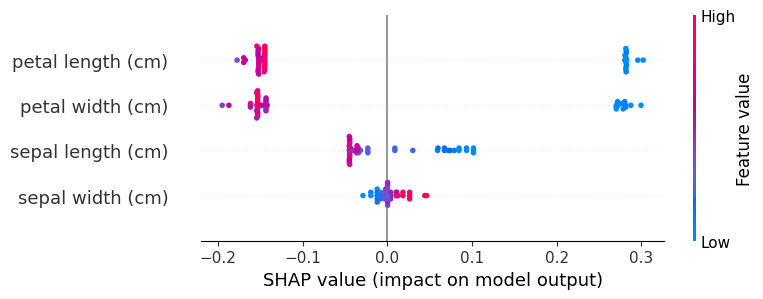

In [21]:
shap.summary_plot(shap_values[0], X_test)

# Display the summary_plot of the label “1”

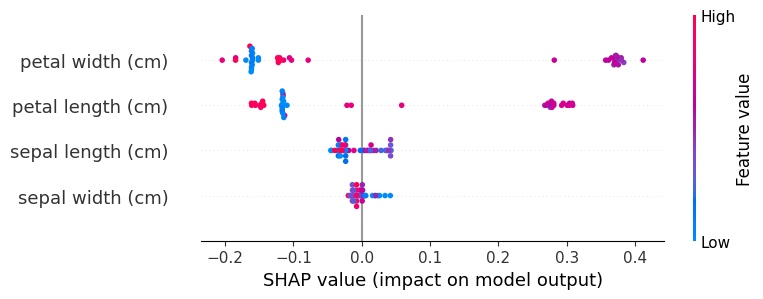

In [ ]:
shap.summary_plot(shap_values[1], X_test)

# Display the summary_plot of the label “2”

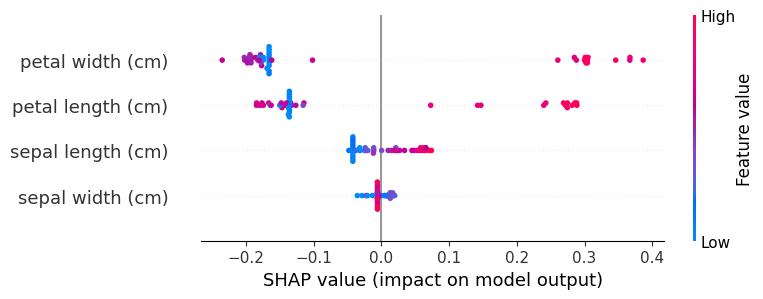

In [ ]:
shap.summary_plot(shap_values[2], X_test)

In [21]:
shap_values[0][0]

array([-0.02268716,  0.02631847,  0.3410306 ,  0.28476666])

**Water Fall Plot**

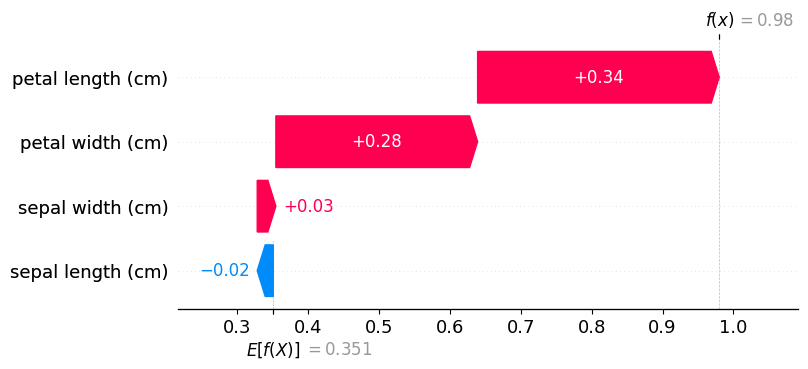

In [22]:
shap.waterfall_plot(shap.Explanation(values=shap_values[0][0],
                                         base_values=explainer.expected_value[0],
                                         feature_names=X_test.columns.tolist()))

# California housing dataset
One of the simplest model types is standard linear regression, and so below we train a linear regression model on the **California housing dataset**. This dataset consists of 20,640 blocks of houses across California in 1990, where our goal is to predict the natural log of the median home price from 8 different features:

MedInc - median income in block group

HouseAge - median house age in block group

AveRooms - average number of rooms per household

AveBedrms - average number of bedrooms per household

Population - block group population

AveOccup - average number of household members

Latitude - block group latitude

Longitude - block group longitude

In [4]:
import sklearn

import shap

# a classic housing price dataset
X, y = shap.datasets.california(n_points=1000)

X100 = shap.utils.sample(X, 100)  # 100 instances for use as the background distribution

# a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [7]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)

ExactExplainer explainer: 1001it [00:17, 28.06it/s]                         


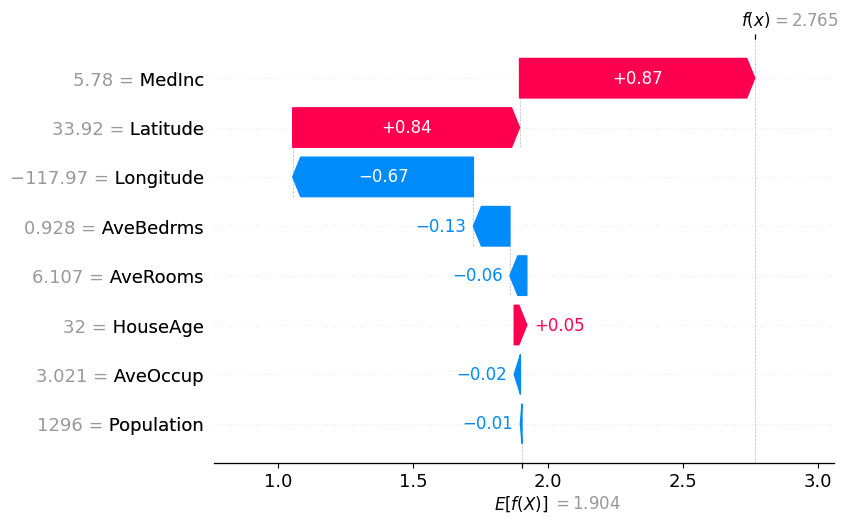

In [8]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[1], max_display=14)

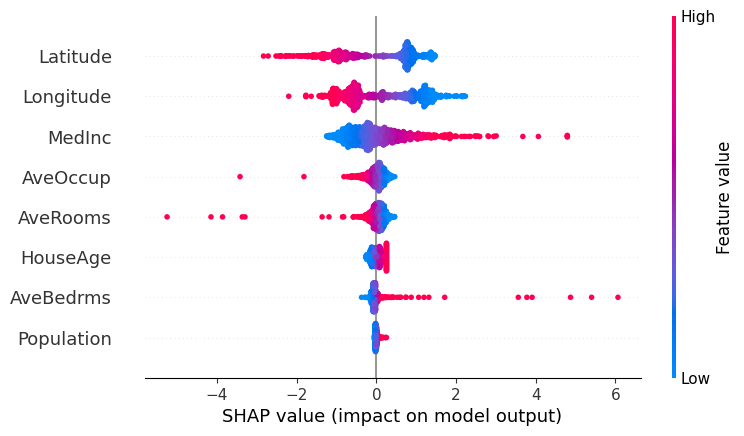

In [10]:
# the waterfall_plot shows how we get from explainer.expected_value to model.predict(X)[sample_ind]
shap.plots.beeswarm(shap_values)

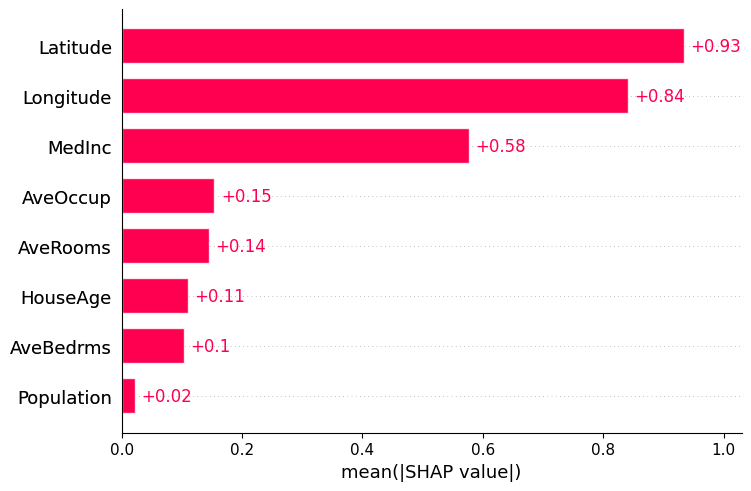

In [11]:
shap.plots.bar(shap_values)